<a href="https://colab.research.google.com/github/tahae02/Week-3-Advanced-Data-Analysis-Techniques-and-Business-Insights/blob/main/Week_3_Advanced_Data_Analysis_Techniques_and_Business_Insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This notebook contains all the data cleaning, visualisations and machine learning algorithm

In [20]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

file_path="/content/drive/MyDrive/Colab Notebooks/Uptrail Data Internship Projects /Week 3/Week 3 raw_sales_data (1).xlsx"
df=pd.read_excel(file_path)
display(df)

,Customer_ID,Customer_Name,Region,Total_Spend,Purchase_Frequency,Marketing_Spend,Seasonality_Index,Churned
0,101,John Doe,North,5000,12,2000,1.2,No
1,102,Jane Smith,South,3000,8,1500,1.0,Yes
2,103,Sam Brown,East,4500,10,1800,1.1,No
3,104,Linda Johnson,West,2500,5,1000,0.9,Yes
4,105,Michael Lee,North,7000,15,2500,1.3,No
5,106,Emily Davis,South,3200,7,1400,1.0,Yes
6,107,David Wilson,East,5300,14,2300,1.2,No
7,108,Susan White,West,2900,6,1100,0.8,Yes
8,109,Chris Martin,North,6000,13,2200,1.2,No
9,110,Anna Taylor,South,3100,8,1350,0.9,Yes


In [21]:
df.duplicated().sum() ## means no duplicates

np.int64(0)

## The dataset looks pretty clean  

# Moving on to the Linear Regression modelling

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
x = df[['Marketing_Spend', 'Seasonality_Index']]
y=df['Total_Spend']

model=LinearRegression()
model.fit(x,y)
print(model.coef_, model.intercept_)

scaler = StandardScaler()

[   2.83396584 -106.26185958] -498.48197343453467


#Linear Regression

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
x = df[['Marketing_Spend', 'Seasonality_Index']]
y = df['Total_Spend']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)

print(model.coef_, model.intercept_)
print("MSE = " + str(mean_squared_error(y_test, y_pred)))
print("R^2 score = " + str(r2_score(y_test, y_pred)))

[1306.7172729   130.13757577] 4175.0
MSE = 178185.61039034853
R^2 score = 0.7932581750365789


plotting the linear regression  

## plotting linear regression

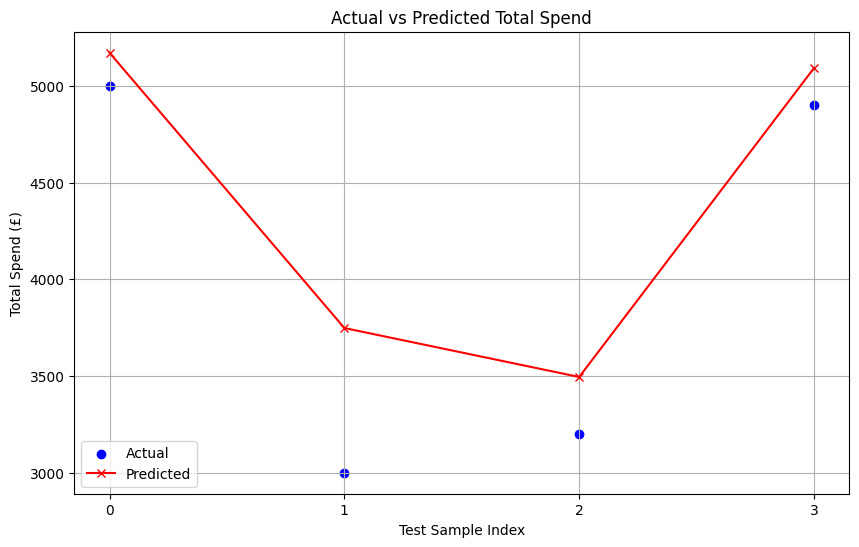

In [24]:
import matplotlib.pyplot as plt

# Plot actual as dots and predicted as line
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='red', label='Predicted', marker='x')
plt.xlabel('Test Sample Index')  # Updated label for clarity
plt.ylabel('Total Spend (£)')
plt.title('Actual vs Predicted Total Spend')
plt.xticks(range(len(y_test)))  # Set ticks to whole numbers: 0, 1, 2, 3
plt.legend()
plt.grid(True)
plt.savefig('regression_plot.png')
plt.show()


In [25]:
values = df[["Total_Spend", "Marketing_Spend", "Seasonality_Index"]]
values_sorted = values.sort_values(by="Seasonality_Index", ascending=True)
display(values_sorted)

,Total_Spend,Marketing_Spend,Seasonality_Index
7,2900,1100,0.8
11,2600,1050,0.8
9,3100,1350,0.9
3,2500,1000,0.9
15,2700,1150,0.9
13,3300,1450,1.0
5,3200,1400,1.0
1,3000,1500,1.0
14,4900,2000,1.1
10,4700,1900,1.1


## Cross validation for Linear regression

In [26]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, scaler.fit_transform(x), y, cv=5, scoring='r2')
print("Cross-Validation R-squared Scores:", cv_scores)
print("Mean CV R-squared:", cv_scores.mean().round(2))
print("Standard Deviation CV R-squared:", cv_scores.std().round(2))

Cross-Validation R-squared Scores: [0.87714673 0.90068465 0.91413944 0.97621166 0.96727438]
Mean CV R-squared: 0.93
Standard Deviation CV R-squared: 0.04


#Logistic regression

Accuracy: 1.0
Confusion Matrix:
 [[2 0]
 [0 2]]
Classification Report:
               precision    recall  f1-score   support

    No Churn       1.00      1.00      1.00         2
   Yes Churn       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4

Cross-Validation Accuracy Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
Standard Deviation CV Accuracy: 0.0


,Test Index,Actual Churn,Predicted Churn
0,0,0,0
1,1,1,1
2,2,1,1
3,3,0,0


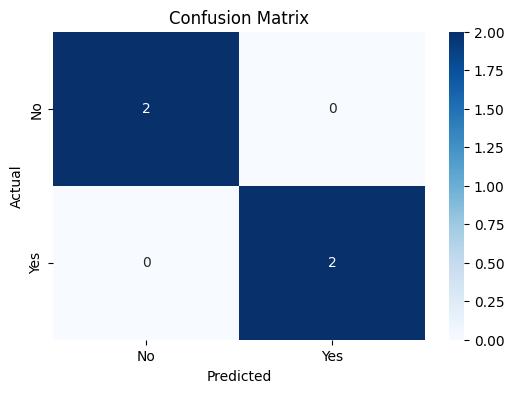

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline

# Prepare features and target
x = df[['Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']]
x = pd.concat([x, pd.get_dummies(df['Region'], prefix='Region', drop_first=True)], axis=1)
y = df['Churned'].map({'Yes': 1, 'No': 0})

# Split data with test_size=0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train model
model = LogisticRegression(random_state=42)
model.fit(x_train_scaled, y_train)

# Predict
y_pred = model.predict(x_test_scaled)

# Print metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['No Churn', 'Yes Churn']))

# Cross-validation
pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=42))
cv_scores = cross_val_score(pipeline, x, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean().round(2))
print("Standard Deviation CV Accuracy:", cv_scores.std().round(2))

# Create table for actual vs predicted
sub_df = pd.DataFrame({
    'Test Index': range(len(y_test)),
    'Actual Churn': y_test.values,
    'Predicted Churn': y_pred
})
display(sub_df)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('logistic_regression_confusion_matrix.png')
plt.show()

# Time series forecasting (ARIMA)
predicting future monthly sales

<ipython-input-38-1867764854>:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Month'] = pd.date_range(start='2024-01-01', periods=len(df), freq='M')
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maxi

,Month,Actual Total Spend,Forecasted Total Spend
0,2025-01-31,5500.0,NaN
1,2025-02-28,3300.0,NaN
2,2025-03-31,4900.0,NaN
3,2025-04-30,2700.0,NaN
4,2025-05-31,NaN,5029.20
5,2025-06-30,NaN,2707.35
6,2025-07-31,NaN,5021.87
7,2025-08-31,NaN,2714.66
8,2025-09-30,NaN,5014.59
9,2025-10-31,NaN,2721.91


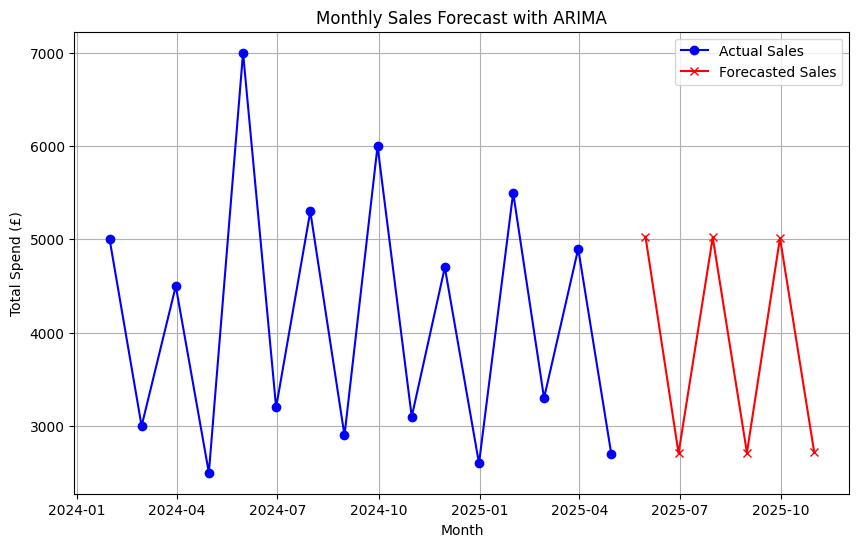

In [38]:
from statsmodels.tsa.arima.model import ARIMA

# Aggregate Total_Spend by Region and assign synthetic months
df['Month'] = pd.date_range(start='2024-01-01', periods=len(df), freq='M')
monthly_sales = df.groupby('Month')['Total_Spend'].sum().reset_index()
monthly_sales.set_index('Month', inplace=True)

# Fit ARIMA model
model = ARIMA(monthly_sales['Total_Spend'], order=(1,1,1))
fit = model.fit()

# Forecast 6 future months
forecast = fit.forecast(steps=6)
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthEnd(1), periods=6, freq='M')
forecast_df = pd.DataFrame({'Forecasted Total Spend': forecast.round(2)}, index=forecast_index)

# Create table for actual and forecasted sales
actual_df = monthly_sales.tail(4).copy()
actual_df.columns = ['Actual Total Spend']
combined_df = pd.concat([actual_df, forecast_df], axis=0)
combined_df.reset_index(inplace=True)
combined_df.columns = ['Month', 'Actual Total Spend', 'Forecasted Total Spend']
display(combined_df)

# Plot time series and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['Total_Spend'], label='Actual Sales', color='blue', marker='o')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='red', marker='x')
plt.xlabel('Month')
plt.ylabel('Total Spend (£)')
plt.title('Monthly Sales Forecast with ARIMA')
plt.legend()
plt.grid(True)
plt.show()

# ANOVA

ANOVA: Sales Performance Across Regions
F-statistic: 39.72
P-value: 0.0000
Conclusion: Reject H₀ (Significant differences in sales across regions)


,Region,Mean Total Spend
0,East,4850.0
1,North,5875.0
2,South,3150.0
3,West,2675.0


<ipython-input-29-3610245170>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region', y='Total_Spend', data=df, palette='Blues')


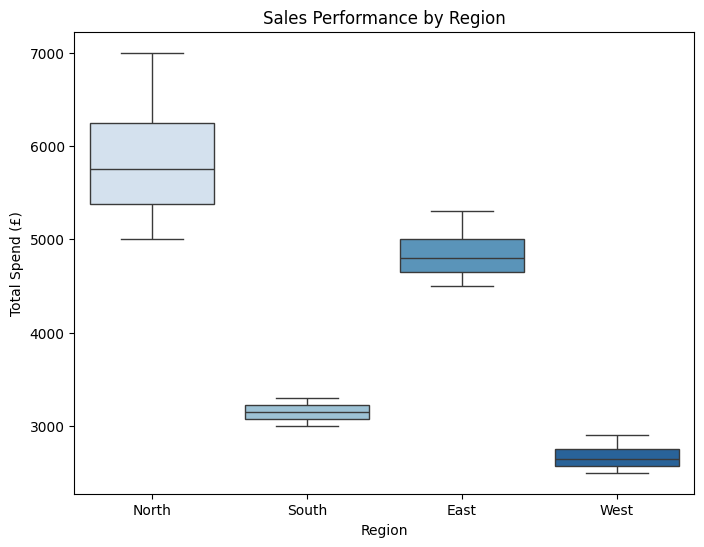

In [29]:
from scipy.stats import f_oneway

# Group Total_Spend by Region
north = df[df['Region'] == 'North']['Total_Spend']
south = df[df['Region'] == 'South']['Total_Spend']
east = df[df['Region'] == 'East']['Total_Spend']
west = df[df['Region'] == 'West']['Total_Spend']

# Perform one-way ANOVA
f_stat, p_value = f_oneway(north, south, east, west)

# Print results
print("ANOVA: Sales Performance Across Regions")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print("Conclusion:", "Reject H₀ (Significant differences in sales across regions)" if p_value < 0.05 else "Fail to reject H₀ (No significant differences)")

# Create table of mean sales by region
mean_sales = df.groupby('Region')['Total_Spend'].mean().round(2).reset_index()
mean_sales.columns = ['Region', 'Mean Total Spend']
display(mean_sales)

# Plot boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Region', y='Total_Spend', data=df, palette='Blues')
plt.xlabel('Region')
plt.ylabel('Total Spend (£)')
plt.title('Sales Performance by Region')
plt.savefig('anova_sales_boxplot.png')
plt.show()


#hypothesis testing

In [30]:
from scipy.stats import ttest_ind

# Define high and low promotion groups based on Marketing_Spend
mean_marketing = df['Marketing_Spend'].mean()
high_promo = df[df['Marketing_Spend'] >= mean_marketing]['Total_Spend']
low_promo = df[df['Marketing_Spend'] < mean_marketing]['Total_Spend']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(high_promo, low_promo, equal_var=False)

# Print results
print("Hypothesis Test: Impact of Promotions on Sales")
print(f"Mean Total_Spend (High Promo): {high_promo.mean():.2f}")
print(f"Mean Total_Spend (Low Promo): {low_promo.mean():.2f}")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")
print("Conclusion:", "Reject H₀ (Promotions increase sales)" if p_value < 0.05 else "Fail to reject H₀ (No significant effect)")

Hypothesis Test: Impact of Promotions on Sales
Mean Total_Spend (High Promo): 5362.50
Mean Total_Spend (Low Promo): 2912.50
T-statistic: 8.02
P-value: 0.0000
Conclusion: Reject H₀ (Promotions increase sales)


#factor analysis

In [31]:
!pip install factor_analyzer

from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

# Select features for factor analysis
x = df[['Purchase_Frequency', 'Marketing_Spend', 'Seasonality_Index']]

# Scale features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform factor analysis
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(x_scaled)

# Get factor loadings
loadings = pd.DataFrame(fa.loadings_, index=x.columns, columns=['Factor 1', 'Factor 2'])
print("\nFactor Loadings:")
display(loadings)

# Interpret factors
print("\nFactor Interpretation:")
print("Factor 1: Likely represents", "customer engagement" if abs(loadings.loc['Purchase_Frequency', 'Factor 1']) > 0.5 else "external influence")
print("Factor 2: Likely represents", "external influence" if abs(loadings.loc['Seasonality_Index', 'Factor 2']) > 0.5 else "customer engagement")


Factor Loadings:


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,Factor 1,Factor 2
Purchase_Frequency,0.776370,0.624066
Marketing_Spend,0.721755,0.688534
Seasonality_Index,0.642912,0.730357



Factor Interpretation:
Factor 1: Likely represents customer engagement
Factor 2: Likely represents external influence


# decision trees

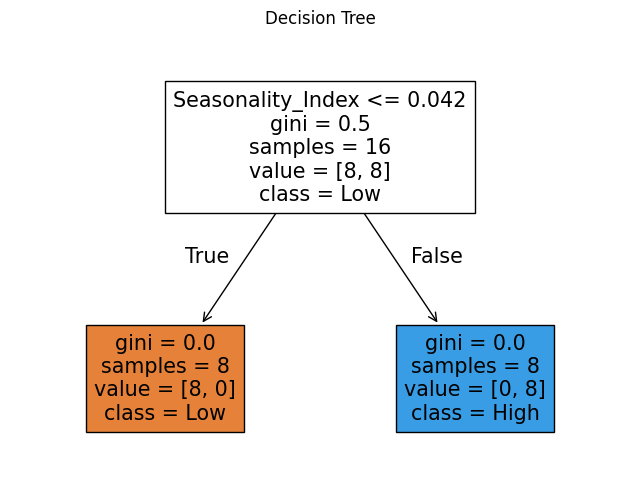

In [32]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

df['Segment'] = (df['Total_Spend'] >= df['Total_Spend'].median()).astype(int)
x = df[['Purchase_Frequency', 'Total_Spend', 'Marketing_Spend', 'Seasonality_Index']]
x = pd.concat([x, pd.get_dummies(df['Region'], prefix='Region', drop_first=True)], axis=1)
y = df['Segment']
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(x_scaled, y)

plt.figure(figsize=(8, 6))
plot_tree(model, feature_names=x.columns, class_names=['Low', 'High'], filled=True)
plt.title('Decision Tree')
plt.savefig('dt_plot.png')
plt.show()

##printing decision trees output

In [33]:
from sklearn.tree import export_text

# Print tree structure
print("Decision Tree Structure:")
print(export_text(model, feature_names=list(x.columns)))

Decision Tree Structure:
|--- Seasonality_Index <= 0.04
|   |--- class: 0
|--- Seasonality_Index >  0.04
|   |--- class: 1



#K-Means clustering

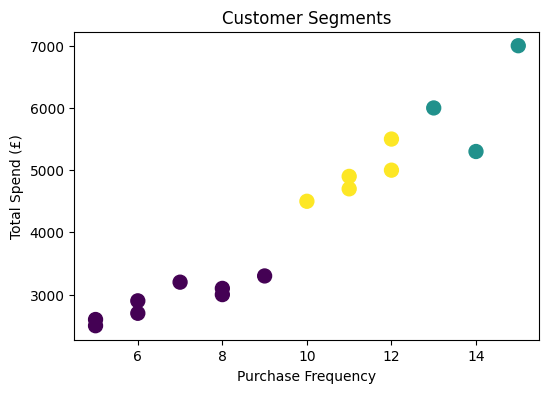

In [34]:

import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


x = df[['Total_Spend', 'Purchase_Frequency']]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(x_scaled)

plt.figure(figsize=(6, 4))
plt.scatter(df['Purchase_Frequency'], df['Total_Spend'], c=df['Cluster'], cmap='viridis', s=100)
plt.xlabel('Purchase Frequency')
plt.ylabel('Total Spend (£)')
plt.title('Customer Segments')
plt.show()

##Printing the k-means output

In [35]:
# Print plot data
print("K-Means Cluster Data:")
print(df[['Purchase_Frequency', 'Total_Spend', 'Cluster']].to_string(index=False))

K-Means Cluster Data:
 Purchase_Frequency  Total_Spend  Cluster
                 12         5000        2
                  8         3000        0
                 10         4500        2
                  5         2500        0
                 15         7000        1
                  7         3200        0
                 14         5300        1
                  6         2900        0
                 13         6000        1
                  8         3100        0
                 11         4700        2
                  5         2600        0
                 12         5500        2
                  9         3300        0
                 11         4900        2
                  6         2700        0


# Ensemble Learning

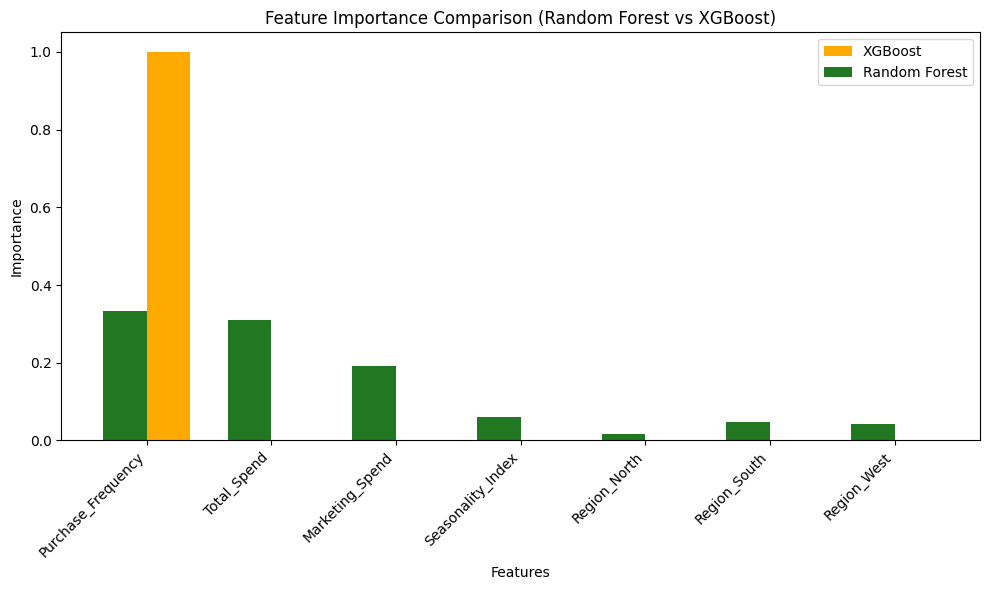

In [36]:

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

x = df[['Purchase_Frequency', 'Total_Spend', 'Marketing_Spend', 'Seasonality_Index']]
x = pd.concat([x, pd.get_dummies(df['Region'], prefix='Region', drop_first=True)], axis=1)
y = df['Churned'].map({'Yes': 1, 'No': 0})
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

xgb = XGBClassifier(n_estimators=50, random_state=42)
xgb.fit(x_scaled, y)
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(x_scaled, y)


plt.figure(figsize=(10, 6))
bar_width = 0.35  # Half width for each model
x_positions = np.arange(len(x.columns))  # Feature indices
plt.bar(x_positions + bar_width/2, xgb.feature_importances_, bar_width, label='XGBoost', color='#ffaa00')
plt.bar(x_positions - bar_width/2, rf.feature_importances_, bar_width, label='Random Forest', color='#227722')


plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison (Random Forest vs XGBoost)')
plt.xticks(x_positions, x.columns, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.savefig('ensemble_plot_updated.png', dpi=300)
plt.show()

##printing ensemble learning output

In [37]:
# Print feature importances
print("Random Forest Feature Importances:")
for f, i in zip(x.columns, rf.feature_importances_):
    print(f"{f}: {i:.4f}")
print("\nXGBoost Feature Importances:")
for f, i in zip(x.columns, xgb.feature_importances_):
    print(f"{f}: {i:.4f}")

Random Forest Feature Importances:
Purchase_Frequency: 0.3328
Total_Spend: 0.3089
Marketing_Spend: 0.1929
Seasonality_Index: 0.0600
Region_North: 0.0170
Region_South: 0.0472
Region_West: 0.0412

XGBoost Feature Importances:
Purchase_Frequency: 1.0000
Total_Spend: 0.0000
Marketing_Spend: 0.0000
Seasonality_Index: 0.0000
Region_North: 0.0000
Region_South: 0.0000
Region_West: 0.0000
